In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('data\youth_smoking_drug_data_10000_rows_expanded.csv')
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3


### **Data Understanding and Cleaning:**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

In [32]:
df.isna().sum()

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64

**Check for Unique Values in Categorical Columns**

In [33]:
# Display unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}:\n", df[column].unique())


Unique values in Age_Group:
 ['15-19' '10-14' '40-49' '70-79' '30-39' '60-69' '50-59' '25-29' '80+'
 '20-24']
Unique values in Gender:
 ['Both' 'Female' 'Male']
Unique values in Socioeconomic_Status:
 ['High' 'Middle' 'Low']
Unique values in School_Programs:
 ['Yes' 'No']
Unique values in Access_to_Counseling:
 ['No' 'Yes']
Unique values in Substance_Education:
 ['No' 'Yes']


**Identify Outliers in Numerical Columns**

In [34]:
import numpy as np

# Define function to find outliers using IQR
def find_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Apply function to each numerical column
for column in df.select_dtypes(include=np.number).columns:
    outliers = find_outliers_IQR(df, column)
    print(f"Outliers in {column}:\n", outliers)


Outliers in Year:
 Empty DataFrame
Columns: [Year, Age_Group, Gender, Smoking_Prevalence, Drug_Experimentation, Socioeconomic_Status, Peer_Influence, School_Programs, Family_Background, Mental_Health, Access_to_Counseling, Parental_Supervision, Substance_Education, Community_Support, Media_Influence]
Index: []
Outliers in Smoking_Prevalence:
 Empty DataFrame
Columns: [Year, Age_Group, Gender, Smoking_Prevalence, Drug_Experimentation, Socioeconomic_Status, Peer_Influence, School_Programs, Family_Background, Mental_Health, Access_to_Counseling, Parental_Supervision, Substance_Education, Community_Support, Media_Influence]
Index: []
Outliers in Drug_Experimentation:
 Empty DataFrame
Columns: [Year, Age_Group, Gender, Smoking_Prevalence, Drug_Experimentation, Socioeconomic_Status, Peer_Influence, School_Programs, Family_Background, Mental_Health, Access_to_Counseling, Parental_Supervision, Substance_Education, Community_Support, Media_Influence]
Index: []
Outliers in Peer_Influence:
 Empty

**Check for Invalid or Unexpected Values**

In [35]:
# Check for unexpected values in columns that should be binary or limited
binary_columns = ['School_Programs', 'Access_to_Counseling', 'Substance_Education']
for column in binary_columns:
    print(f"Unique values in {column}:\n", df[column].unique())


Unique values in School_Programs:
 ['Yes' 'No']
Unique values in Access_to_Counseling:
 ['No' 'Yes']
Unique values in Substance_Education:
 ['No' 'Yes']


**Encoding Features**

In [36]:
df['Age_Group'].value_counts()

Age_Group
20-24    1045
30-39    1021
60-69    1020
15-19    1014
10-14    1007
40-49    1001
50-59    1001
80+       979
25-29     974
70-79     938
Name: count, dtype: int64

In [37]:
df['Age_Group'].unique()

array(['15-19', '10-14', '40-49', '70-79', '30-39', '60-69', '50-59',
       '25-29', '80+', '20-24'], dtype=object)

In [38]:
# Define midpoint values for each age group
age_group_mapping = {
    '10-14': 12,
    '15-19': 17,
    '20-24': 22,
    '25-29': 27,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80+': 85
}

# Map the age groups to midpoints
df['Age_Group_Midpoint'] = df['Age_Group'].map(age_group_mapping)

# Verify the transformation
print(df[['Age_Group', 'Age_Group_Midpoint']].head())


  Age_Group  Age_Group_Midpoint
0     15-19                  17
1     10-14                  12
2     10-14                  12
3     40-49                  45
4     15-19                  17


In [39]:
# Drop the original Age_Group column
df.drop(columns=['Age_Group'], inplace=True)

# Verify the column was dropped
df.head()


,Year,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence,Age_Group_Midpoint
0,2024,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1,17
1,2024,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3,12
2,2023,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1,12
3,2024,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9,45
4,2023,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3,17


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Gender                10000 non-null  object 
 2   Smoking_Prevalence    10000 non-null  float64
 3   Drug_Experimentation  10000 non-null  float64
 4   Socioeconomic_Status  10000 non-null  object 
 5   Peer_Influence        10000 non-null  int64  
 6   School_Programs       10000 non-null  object 
 7   Family_Background     10000 non-null  int64  
 8   Mental_Health         10000 non-null  int64  
 9   Access_to_Counseling  10000 non-null  object 
 10  Parental_Supervision  10000 non-null  int64  
 11  Substance_Education   10000 non-null  object 
 12  Community_Support     10000 non-null  int64  
 13  Media_Influence       10000 non-null  int64  
 14  Age_Group_Midpoint    10000 non-null  int64  
dtypes: float64(2), int64

In [41]:
# One-hot encode the categorical columns directly in the existing dataframe
df = pd.get_dummies(df, columns=['Gender', 'Socioeconomic_Status', 'School_Programs', 'Access_to_Counseling', 'Substance_Education'], drop_first=True)

# Verify the encoding
df.head()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Smoking_Prevalence           10000 non-null  float64
 2   Drug_Experimentation         10000 non-null  float64
 3   Peer_Influence               10000 non-null  int64  
 4   Family_Background            10000 non-null  int64  
 5   Mental_Health                10000 non-null  int64  
 6   Parental_Supervision         10000 non-null  int64  
 7   Community_Support            10000 non-null  int64  
 8   Media_Influence              10000 non-null  int64  
 9   Age_Group_Midpoint           10000 non-null  int64  
 10  Gender_Female                10000 non-null  bool   
 11  Gender_Male                  10000 non-null  bool   
 12  Socioeconomic_Status_Low     10000 non-null  bool   
 13  Socioeconomic_Sta

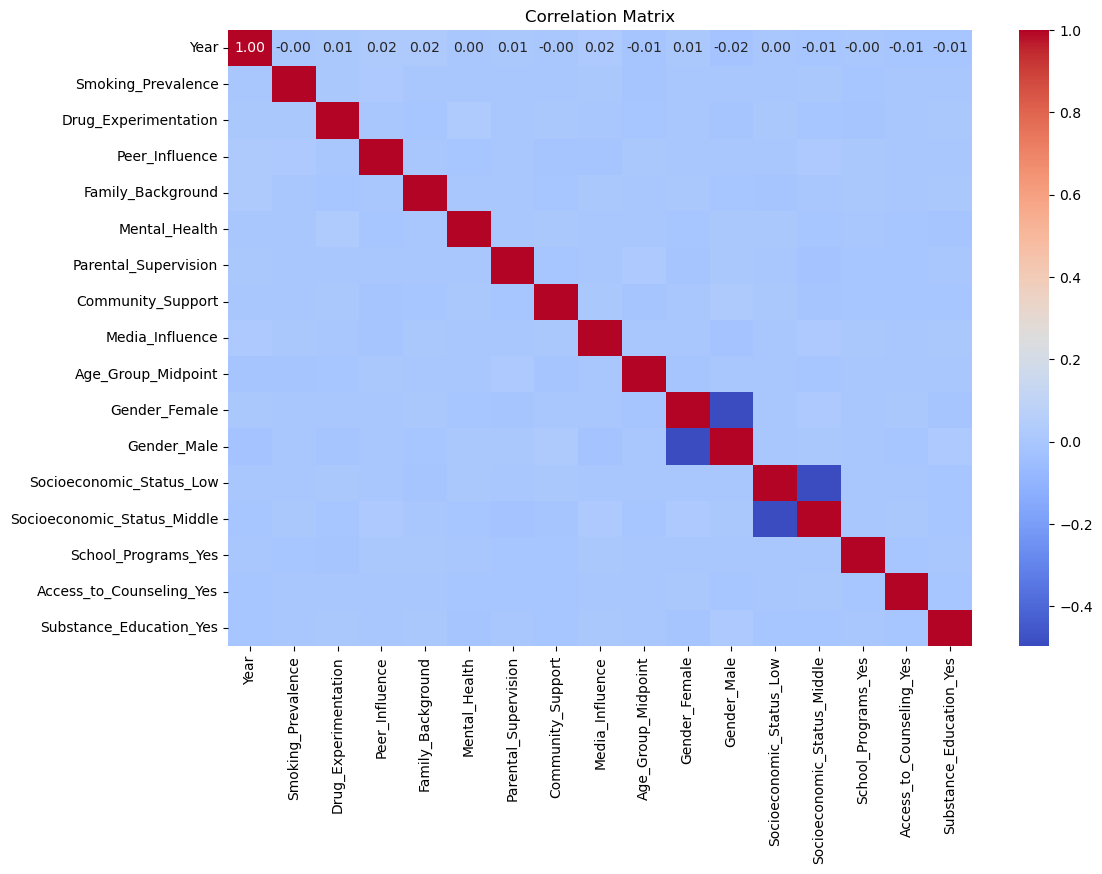

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [43]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop(columns=['Smoking_Prevalence', 'Drug_Experimentation'])  # Adjust based on target
y = df['Smoking_Prevalence']  # Use 'Drug_Experimentation' if you want that as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train the models
decision_tree_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [46]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test_scaled)
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"RMSE for Decision Tree Regressor: {rmse_dt:.2f}")
print(f"RMSE for Random Forest Regressor: {rmse_rf:.2f}")


RMSE for Decision Tree Regressor: 18.60
RMSE for Random Forest Regressor: 13.18


In [47]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X_drug_experimentation = df.drop(columns=['Smoking_Prevalence', 'Drug_Experimentation'])  # Adjust based on target
y_drug_experimentation = df['Drug_Experimentation']  # Use 'Drug_Experimentation' if you want that as the target

# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_drug_experimentation, y_drug_experimentation, test_size=0.2, random_state=42)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the models
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train the models
decision_tree_model.fit(X_train_scaled_2, y_train_2)
random_forest_model.fit(X_train_scaled_2, y_train_2)


RandomForestRegressor(random_state=42)

In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test_scaled_2)
y_pred_rf = random_forest_model.predict(X_test_scaled_2)

# Calculate RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test_2, y_pred_dt))
rmse_rf = np.sqrt(mean_squared_error(y_test_2, y_pred_rf))

print(f"RMSE for Decision Tree Regressor: {rmse_dt:.2f}")
print(f"RMSE for Random Forest Regressor: {rmse_rf:.2f}")

RMSE for Decision Tree Regressor: 25.31
RMSE for Random Forest Regressor: 17.73


**Hyperparameter Tuning**

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with RMSE scoring
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best parameters found: ", best_params)
print("Best RMSE after tuning: ", best_rmse)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE after tuning:  13.108887580849302


In [52]:
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestRegressor
rf_2 = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with RMSE scoring
grid_search = GridSearchCV(estimator=rf_2, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled_2, y_train_2)

# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best parameters found: ", best_params)
print("Best RMSE after tuning: ", best_rmse)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best RMSE after tuning:  17.574619979107414
